<h1>Data Exploration</h1>
<p>In this notebook we will perform a broad data exploration on the <code>Auto</code> data set. Note that the aim of this exploration is not to be completely thorough; instead we would like to gain quick insights to help develop a first prototype. Upon analyzing the output of the prototype, we can analyze the data further to gain more insight.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/DataQualityReports.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p>We first read the comma-separated values (csv) <code>College</code> file into a pandas DataFrame. To get a feeling for the data we display the top five rows of the DataFrame using the <code>head()</code> method and we show how many rows and columns the DataFrame has by using the <code>shape</code> attribute. We also show the <code>dtypes</code> attribute, which returns a pandas Series with the data type of each column.</p>

In [2]:
df = pd.read_csv("College.csv")
df = df.set_index('Unnamed: 0')
df.head()
df.shape
df.dtypes

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(777, 18)

Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

<p>Is appears that all the columns have the data type we would expect. We can perform another check to see if any values are missing in the DataFrame using its <code>isnull</code> method.</p>

In [3]:
df[df.isnull().any(axis=1)]
df[df.isnull().any(axis=1)].shape

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,


(0, 18)

<p>There are no obvious missing values in our data. So the next step to be able to produce the data quality reports with our custom <code>createDataQualityReports</code> function is to organize our DataFrame by quantitative and categorical variables using hierarchical indexing.</p>

In [4]:
df.columns = pd.MultiIndex.from_tuples([('categorical', 'Private'), 
                          ('quantitative', 'Apps'), ('quantitative', 'Accept'),
                         ('quantitative', 'Enroll'), ('quantitative', 'Top10perc'), 
                        ('quantitative', 'Top25perc'), ('quantitative', 'F.Undergrad'), 
                        ('quantitative', 'P.Undergrad'), ('quantitative', 'Outstate'), 
                        ('quantitative', 'Room.Board'), ('quantitative', 'Books'), 
                        ('quantitative', 'Personal'), ('quantitative', 'PhD'),
                        ('quantitative', 'Terminal'), ('quantitative', 'S.F.Ratio'),
                        ('quantitative', 'perc.alumni'), ('quantitative', 'Expend'),
                        ('quantitative', 'Grad.Rate')],
                        names=['type of variable', 'variable'])
df.head()

type of variable             categorical quantitative                          \
variable                         Private         Apps Accept Enroll Top10perc   
Unnamed: 0                                                                      
Abilene Christian University         Yes         1660   1232    721        23   
Adelphi University                   Yes         2186   1924    512        16   
Adrian College                       Yes         1428   1097    336        22   
Agnes Scott College                  Yes          417    349    137        60   
Alaska Pacific University            Yes          193    146     55        16   

type of variable                                                         \
variable                     Top25perc F.Undergrad P.Undergrad Outstate   
Unnamed: 0                                                                
Abilene Christian University        52        2885         537     7440   
Adelphi University                  29        2683        1227    12280   
Adrian College                      50        1036          99    11250   
Agnes Scott College                 89         510          63    12960   
Alaska Pacific University           44         249         869     7560   

type of variable                                                               \
variable                     Room.Board Books Personal PhD Terminal S.F.Ratio   
Unnamed: 0                                                                      
Abilene Christian University       3300   450     2200  70       78      18.1   
Adelphi University                 6450   750     1500  29       30      12.2   
Adrian College                     3750   400     1165  53       66      12.9   
Agnes Scott College                5450   450      875  92       97       7.7   
Alaska Pacific University          4120   800     1500  76       72      11.9   

type of variable                                           
variable                     perc.alumni Expend Grad.Rate  
Unnamed: 0                                                 
Abilene Christian University          12   7041        60  
Adelphi University                    16  10527        56  
Adrian College                        30   8735        54  
Agnes Scott College                   37  19016        59  
Alaska Pacific University              2  10922        15

<p>Now we can create the data quality reports.</p>

In [5]:
df_qr_quantitative, df_qr_categorical = createDataQualityReports(df)
df_qr_quantitative.name + ':'
df_qr_quantitative.round(2)
df_qr_categorical.name + ':'
df_qr_categorical.round(2)

'Quantitative Qualilty Report:'

,Count,Miss. (%),Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
variable,,,,,,,,,,
Apps,777,0.0,711,81.0,776.0,3001.64,1558.0,3624.0,48094.0,3870.20
Accept,777,0.0,693,72.0,604.0,2018.80,1110.0,2424.0,26330.0,2451.11
Enroll,777,0.0,581,35.0,242.0,779.97,434.0,902.0,6392.0,929.18
Top10perc,777,0.0,82,1.0,15.0,27.56,23.0,35.0,96.0,17.64
Top25perc,777,0.0,89,9.0,41.0,55.80,54.0,69.0,100.0,19.80
F.Undergrad,777,0.0,714,139.0,992.0,3699.91,1707.0,4005.0,31643.0,4850.42
P.Undergrad,777,0.0,566,1.0,95.0,855.30,353.0,967.0,21836.0,1522.43
Outstate,777,0.0,640,2340.0,7320.0,10440.67,9990.0,12925.0,21700.0,4023.02
Room.Board,777,0.0,553,1780.0,3597.0,4357.53,4200.0,5050.0,8124.0,1096.70


'Categorical Qualilty Report:'

,Count,Miss. (%),Card.,Mode,Mode Freq.,Mode (%),2nd Mode,2nd Mode Freq.,2nd Mode (%)
variable,,,,,,,,,
Private,777,0.0,2,Yes,565,72.72,No,212,27.28


<p>To further gain insight into the data, we use the <code>plotQuantitativeVariables</code> and <code>plotCategoricalVariables</code> functions the produce the frequency plots for each quantitative and categorical variable.</p>

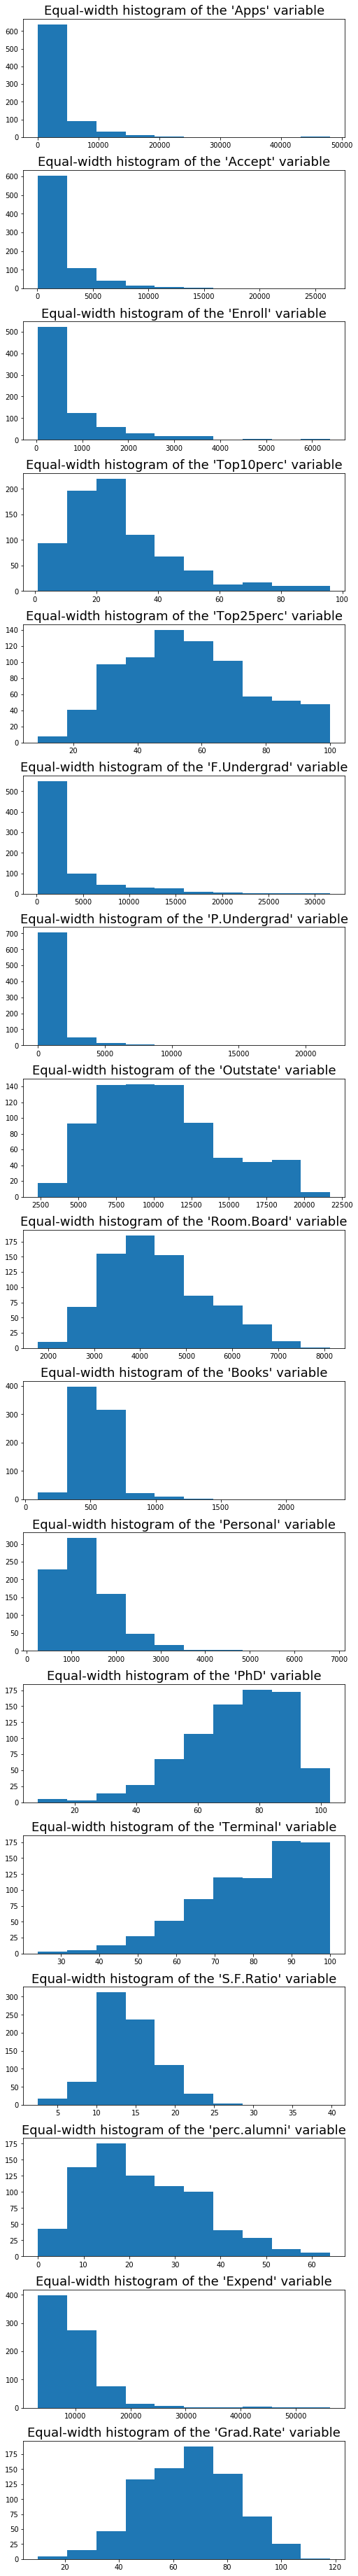

In [6]:
plotQuantitativeVariables(df.xs('quantitative', axis=1), height=3, width=7)

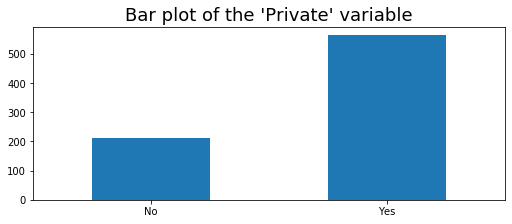

In [7]:
plotCategoricalVariables(df.xs('categorical', axis=1), height=3, width=7)

<p>We also compute the correlation matrix of the variables.</p>

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)